In [1]:
#Author: Shishir, Prasad, Md Rifat, Ananda
#Date: 2025-05-07


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
file_path = "68_nodes_node_wabash_river_74266700241_2023_03_01t00_00_00z_2025_03_11t19_44_21z.csv"
df = pd.read_csv(file_path)

In [3]:
pwd

'c:\\Users\\shish\\OneDrive - purdue.edu\\RA-Prof. Dr. Venkatesh\\SWOT'

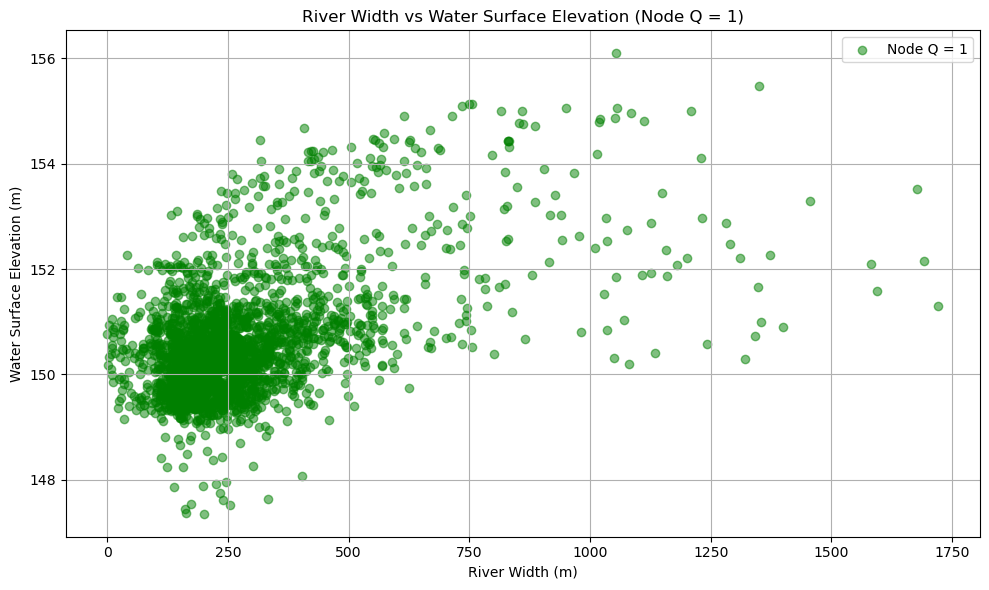

In [4]:
# Filter data for node_q = 1
node_q1_data = df[df['node_q'] == 1]

# Scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(node_q1_data['width'], node_q1_data['wse'], alpha=0.5, c='green', label='Node Q = 1')
plt.title('River Width vs Water Surface Elevation (Node Q = 1)')
plt.xlabel('River Width (m)')
plt.ylabel('Water Surface Elevation (m)')
plt.legend()
plt.grid()
plt.tight_layout()

# Save the figure
output_path = 'figures_env_inf/River Width vs Water Surface Elevation (Node Q = 1).png'
plt.savefig(output_path, dpi=300)  # Save with high resolution
plt.show()

In [5]:
df.head()


,wse,width,area_total,time_str,node_q,p_dist_out,wse_units,width_units,area_total_units,p_dist_out_units
0,149.15302,276.540868,57310.2,2023-07-28 11:23:22,1,2338727.0,m,m,m^2,m
1,147.35831,200.434645,41538.0,2023-08-06 20:30:23,1,2338727.0,m,m,m^2,m
2,149.23871,212.981929,44138.3,2023-08-27 17:15:28,1,2338727.0,m,m,m^2,m
3,149.23486,213.721644,44291.6,2023-09-08 04:53:34,1,2338727.0,m,m,m^2,m
4,149.18223,110.237587,22845.6,2023-09-17 14:00:34,1,2338727.0,m,m,m^2,m


C:\Users\shish\AppData\Local\Temp\ipykernel_65128\2926376418.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  node_q1_data['time_str'] = pd.to_datetime(node_q1_data['time_str'], errors='coerce')


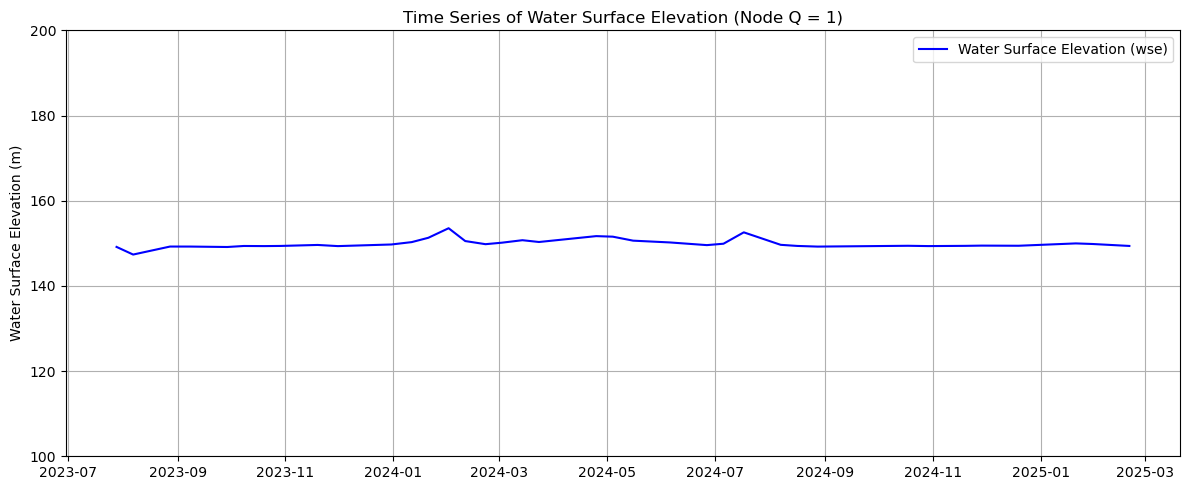

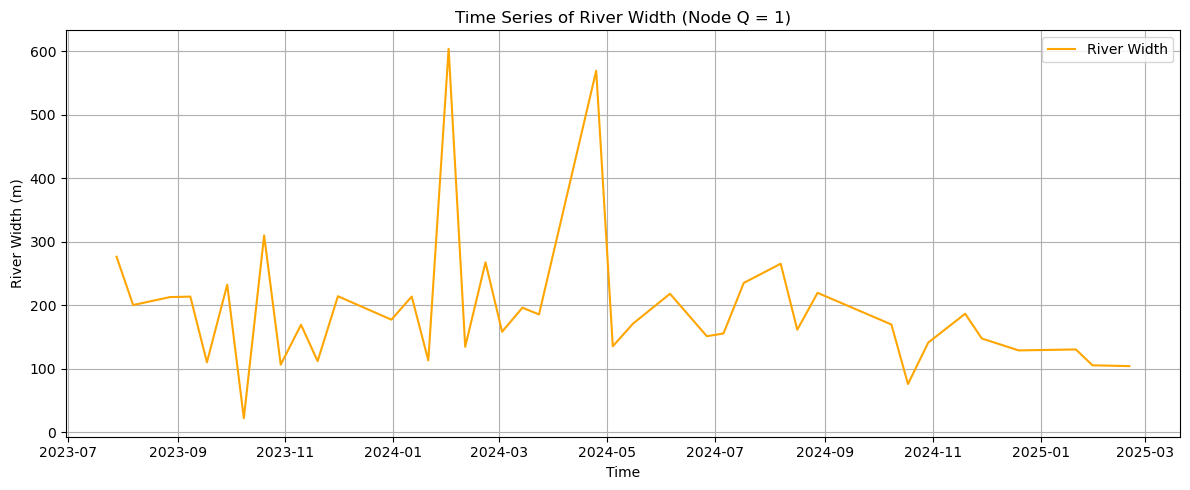

In [6]:
# Filter data for node_q = 1
node_q1_data = df[df['node_q'] == 1]

# Convert 'time_str' to datetime
node_q1_data['time_str'] = pd.to_datetime(node_q1_data['time_str'], errors='coerce')

# Plot Water Surface Elevation (wse)
plt.figure(figsize=(12, 5))
plt.plot(node_q1_data['time_str'], node_q1_data['wse'], label='Water Surface Elevation (wse)', color='blue')
plt.title('Time Series of Water Surface Elevation (Node Q = 1)')
plt.ylabel('Water Surface Elevation (m)')
plt.ylim(100, 200)  # Set y-axis limits for wse
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('figures_env_inf/wse_timeseries_node_q1_zoomed.png', dpi=300)  # Save with high resolution
plt.show()

# Plot River Width
plt.figure(figsize=(12, 5))
plt.plot(node_q1_data['time_str'], node_q1_data['width'], label='River Width', color='orange')
plt.title('Time Series of River Width (Node Q = 1)')
plt.xlabel('Time')
plt.ylabel('River Width (m)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('figures_env_inf/width_timeseries_node_q1.png', dpi=300)  # Save with high resolution
plt.show()

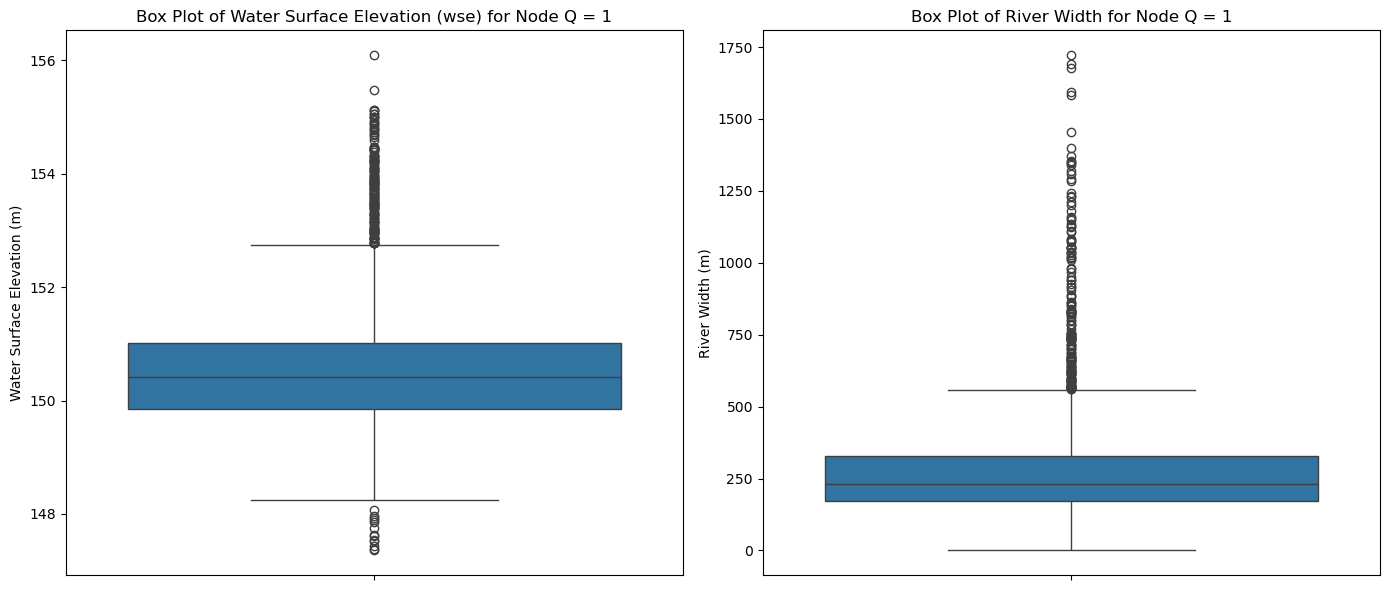

In [7]:
# Create a box plot for water surface elevation (wse) and river width (width)
plt.figure(figsize=(14, 6))

# Box plot for wse
plt.subplot(1, 2, 1)
sns.boxplot(data=node_q1_data, y='wse')
plt.title('Box Plot of Water Surface Elevation (wse) for Node Q = 1')
plt.ylabel('Water Surface Elevation (m)')
plt.tight_layout()
plt.savefig('figures_env_inf/wse_boxplot.png', dpi=300)  # Save with high resolution

# Box plot for width
plt.subplot(1, 2, 2)
sns.boxplot(data=node_q1_data, y='width')
plt.title('Box Plot of River Width for Node Q = 1')
plt.ylabel('River Width (m)')
plt.tight_layout()
plt.savefig('figures_env_inf/width_boxplot.png', dpi=300)  # Save with high resolution

plt.show()



In [8]:
# --- Calculate "No Data" counts ---
# Count missing or NaN values for wse and width in node_q1_data
no_data_wse = node_q1_data['wse'].isnull().sum()
no_data_width = node_q1_data['width'].isnull().sum()

# --- Calculate Box Plot Outliers using the IQR method ---
# For wse outliers
Q1_wse = node_q1_data['wse'].quantile(0.25)
Q3_wse = node_q1_data['wse'].quantile(0.75)
IQR_wse = Q3_wse - Q1_wse
outliers_wse = node_q1_data[
    (node_q1_data['wse'] < (Q1_wse - 1.5 * IQR_wse)) | 
    (node_q1_data['wse'] > (Q3_wse + 1.5 * IQR_wse))
]
box_outliers_wse = outliers_wse.shape[0]

# For width outliers
Q1_width = node_q1_data['width'].quantile(0.25)
Q3_width = node_q1_data['width'].quantile(0.75)
IQR_width = Q3_width - Q1_width
outliers_width = node_q1_data[
    (node_q1_data['width'] < (Q1_width - 1.5 * IQR_width)) | 
    (node_q1_data['width'] > (Q3_width + 1.5 * IQR_width))
]
box_outliers_width = outliers_width.shape[0]

# --- Calculate "Range Fail" counts ---
# Example: count rows where wse is not within an expected range (here 100 to 1000)
range_fail_wse = node_q1_data[(node_q1_data['wse'] < 100) | (node_q1_data['wse'] > 1000)].shape[0]
# Let's assume no range condition for width; otherwise set accordingly.
range_fail_width = 0

# --- Calculate "Anomaly" counts ---
# Sorting data by width and enforcing strictly increasing wse condition
node_q1_data_sorted = node_q1_data.sort_values(by="width").reset_index(drop=True)
anomaly_count_wse = 0
anomaly_count_width = 0
filtered_data = []
prev_wse = -np.inf  # Initialize previous wse to a very low value

for _, row in node_q1_data_sorted.iterrows():
    if row["wse"] >= prev_wse:
        filtered_data.append(row)
        prev_wse = row["wse"]
    else:
        anomaly_count_wse += 1
        anomaly_count_width += 1

# (Optional) Create a filtered DataFrame if needed later
df_filtered = pd.DataFrame(filtered_data)

# --- Build the summary dictionary ---
summary = {
    "Category": ["No Data", "Box Plot Outliers", "Range Fail", "Anomaly"],
    "WSE": [no_data_wse, box_outliers_wse, range_fail_wse, anomaly_count_wse],
    "Width": [no_data_width, box_outliers_width, range_fail_width, anomaly_count_width]
}

# Convert to DataFrame and display
summary_df = pd.DataFrame(summary)
print(summary_df)



            Category   WSE  Width
0            No Data     0      0
1  Box Plot Outliers   170    175
2         Range Fail     0      0
3            Anomaly  2469   2469


In [9]:
# Remove box plot outliers and anomalies
cleaned_data = df_filtered[~df_filtered.index.isin(summary_df[(summary_df['Category'] == 'Box Plot Outliers') | (summary_df['Category'] == 'Anomaly')].index)]
cleaned_data.head()



,wse,width,area_total,time_str,node_q,p_dist_out,wse_units,width_units,area_total_units,p_dist_out_units
0,150.77577,0.146481,31.3,NaT,1,2345316.0,m,m,m^2,m
2,150.94775,2.465814,559.9,NaT,1,2346921.0,m,m,m^2,m
7,151.05186,8.941714,1914.5,NaT,1,2349906.0,m,m,m^2,m
16,151.46381,19.395749,4404.4,NaT,1,2346921.0,m,m,m^2,m
23,151.47934,27.655453,5188.6,NaT,1,2347309.0,m,m,m^2,m


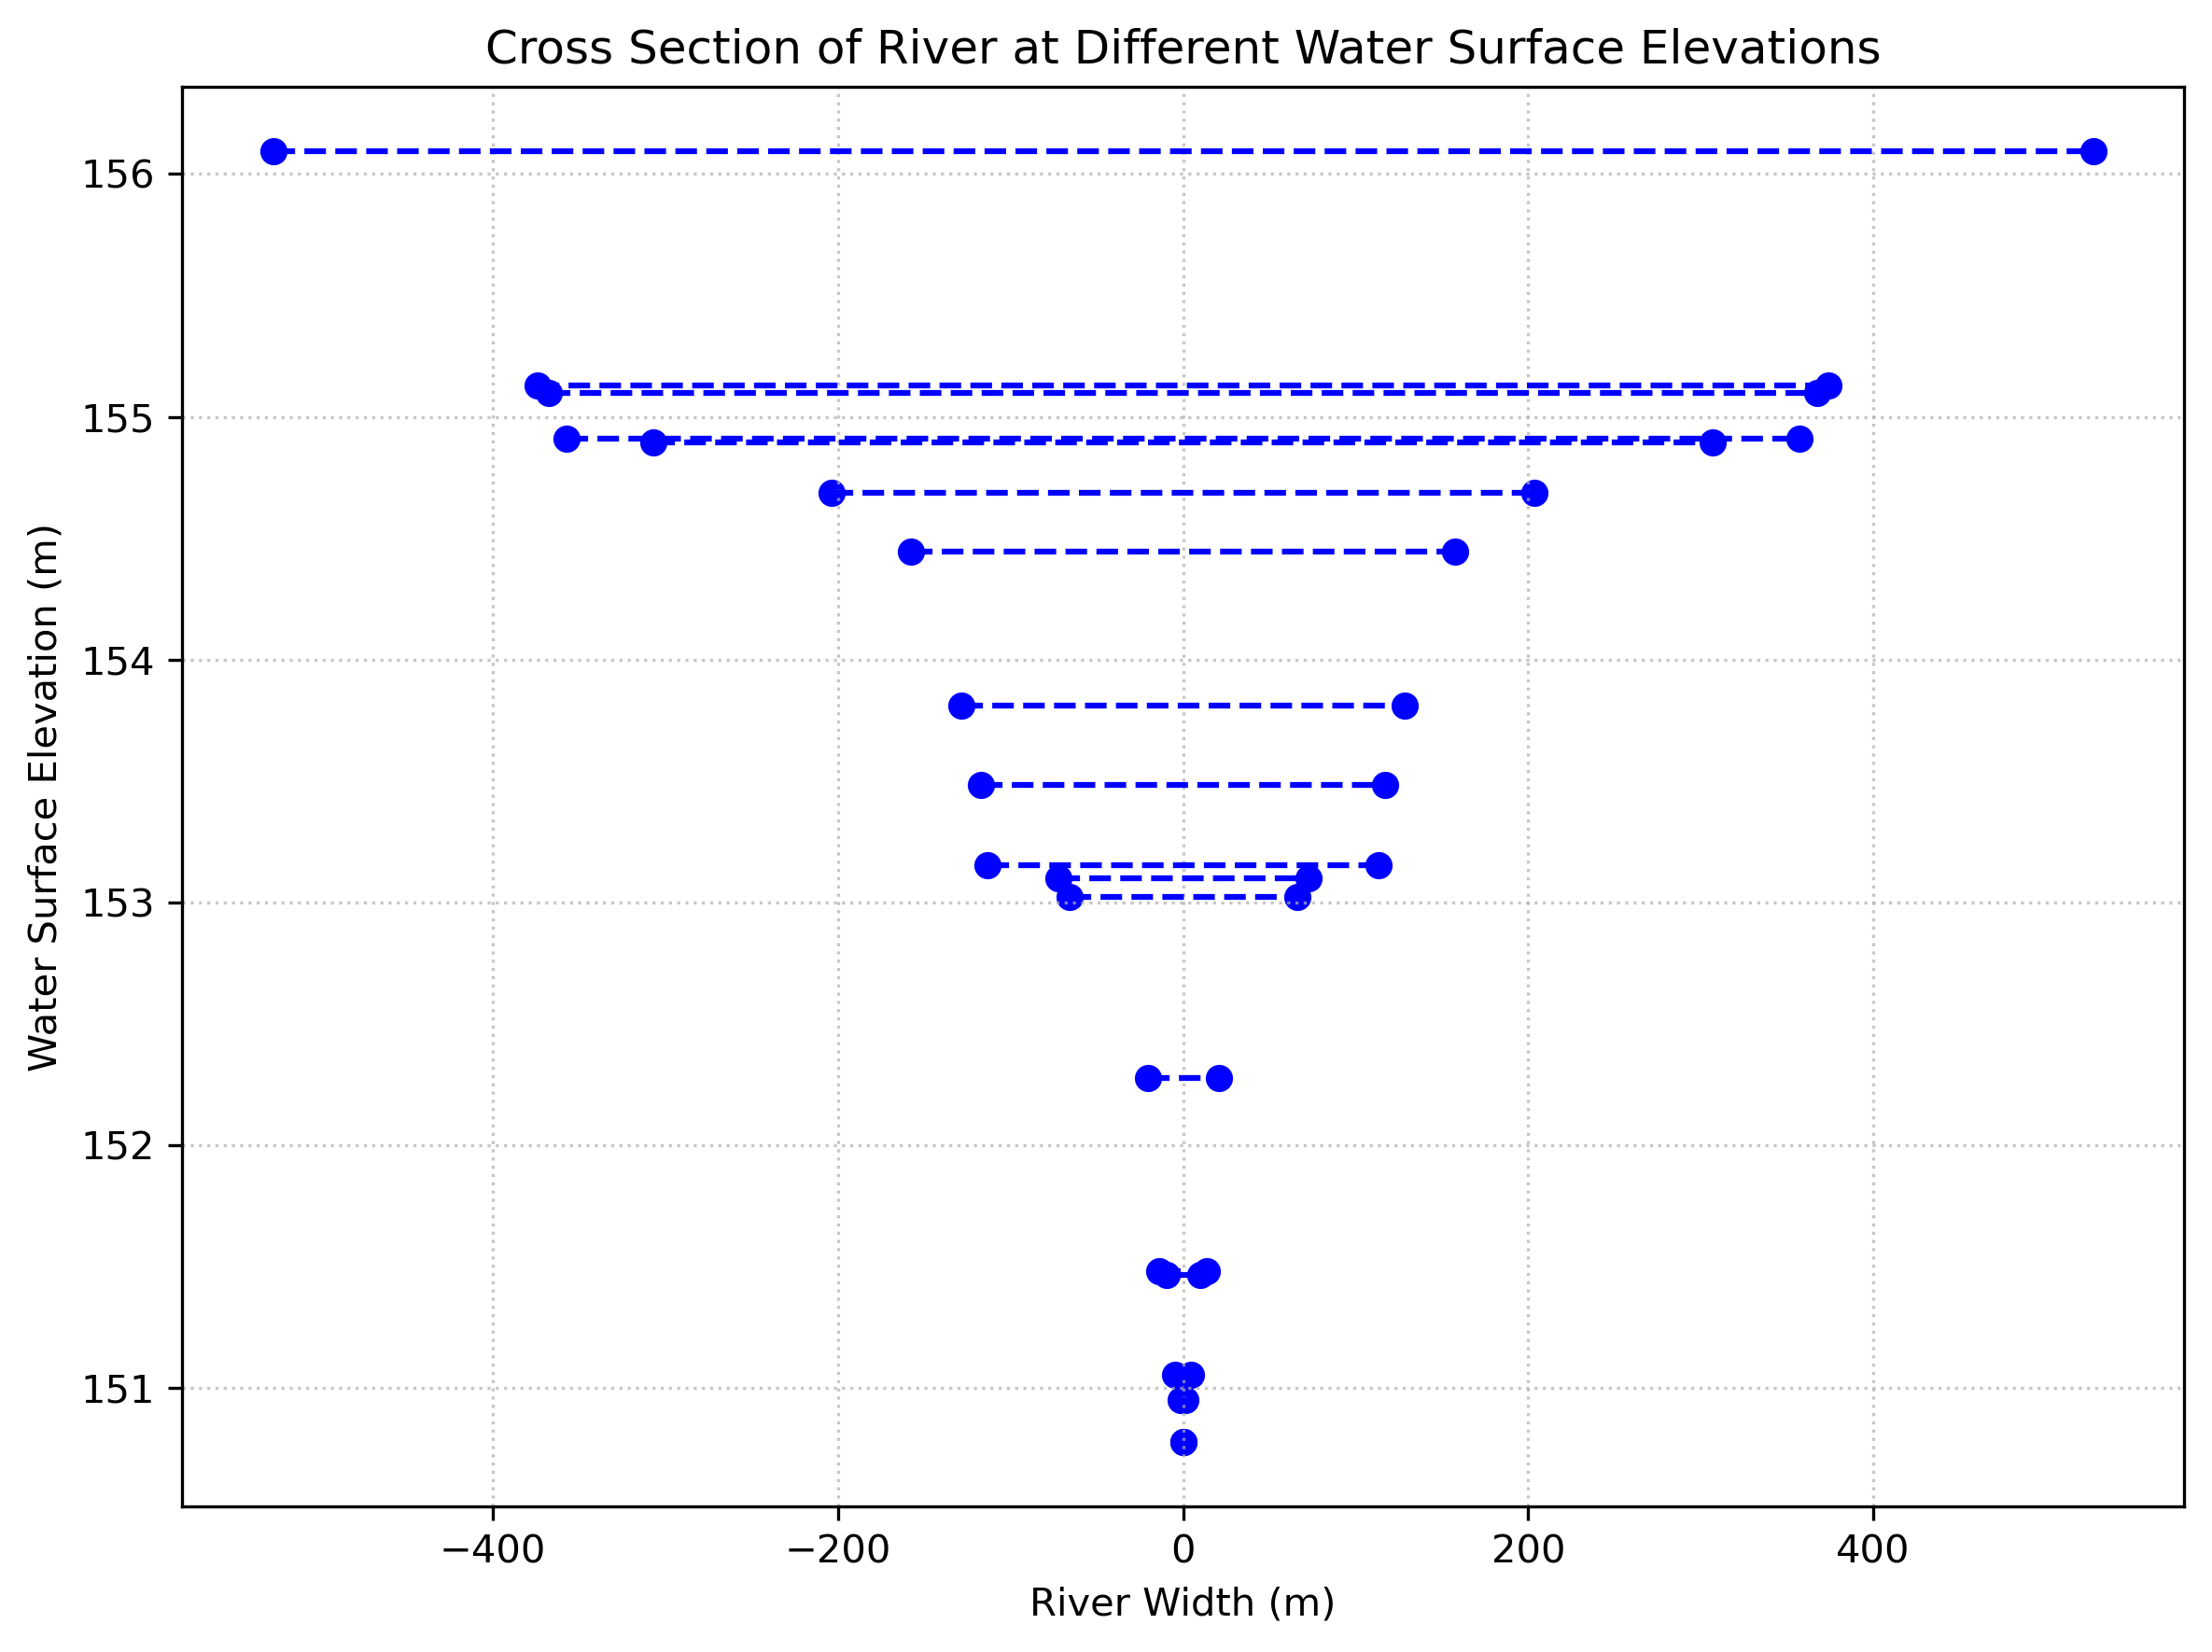

In [10]:
# Plot the cross-section
plt.figure(figsize=(8, 6), dpi=300)  # Set high resolution with dpi=300

for _, row in cleaned_data.iterrows():
    width_half = row["width"] / 2
    wse = row["wse"]

    plt.scatter([-width_half, width_half], [wse, wse], color="blue")
    plt.plot([-width_half, width_half], [wse, wse], linestyle="dashed", color="blue")

plt.xlabel("River Width (m)")
plt.ylabel("Water Surface Elevation (m)")
plt.title("Cross Section of River at Different Water Surface Elevations")
plt.grid(True, linestyle=":", alpha=0.7)
plt.tight_layout()  # Adjust layout
plt.savefig('figures_env_inf/cross_section_node_1.png', dpi=300)  # Save with high resolution
plt.show()

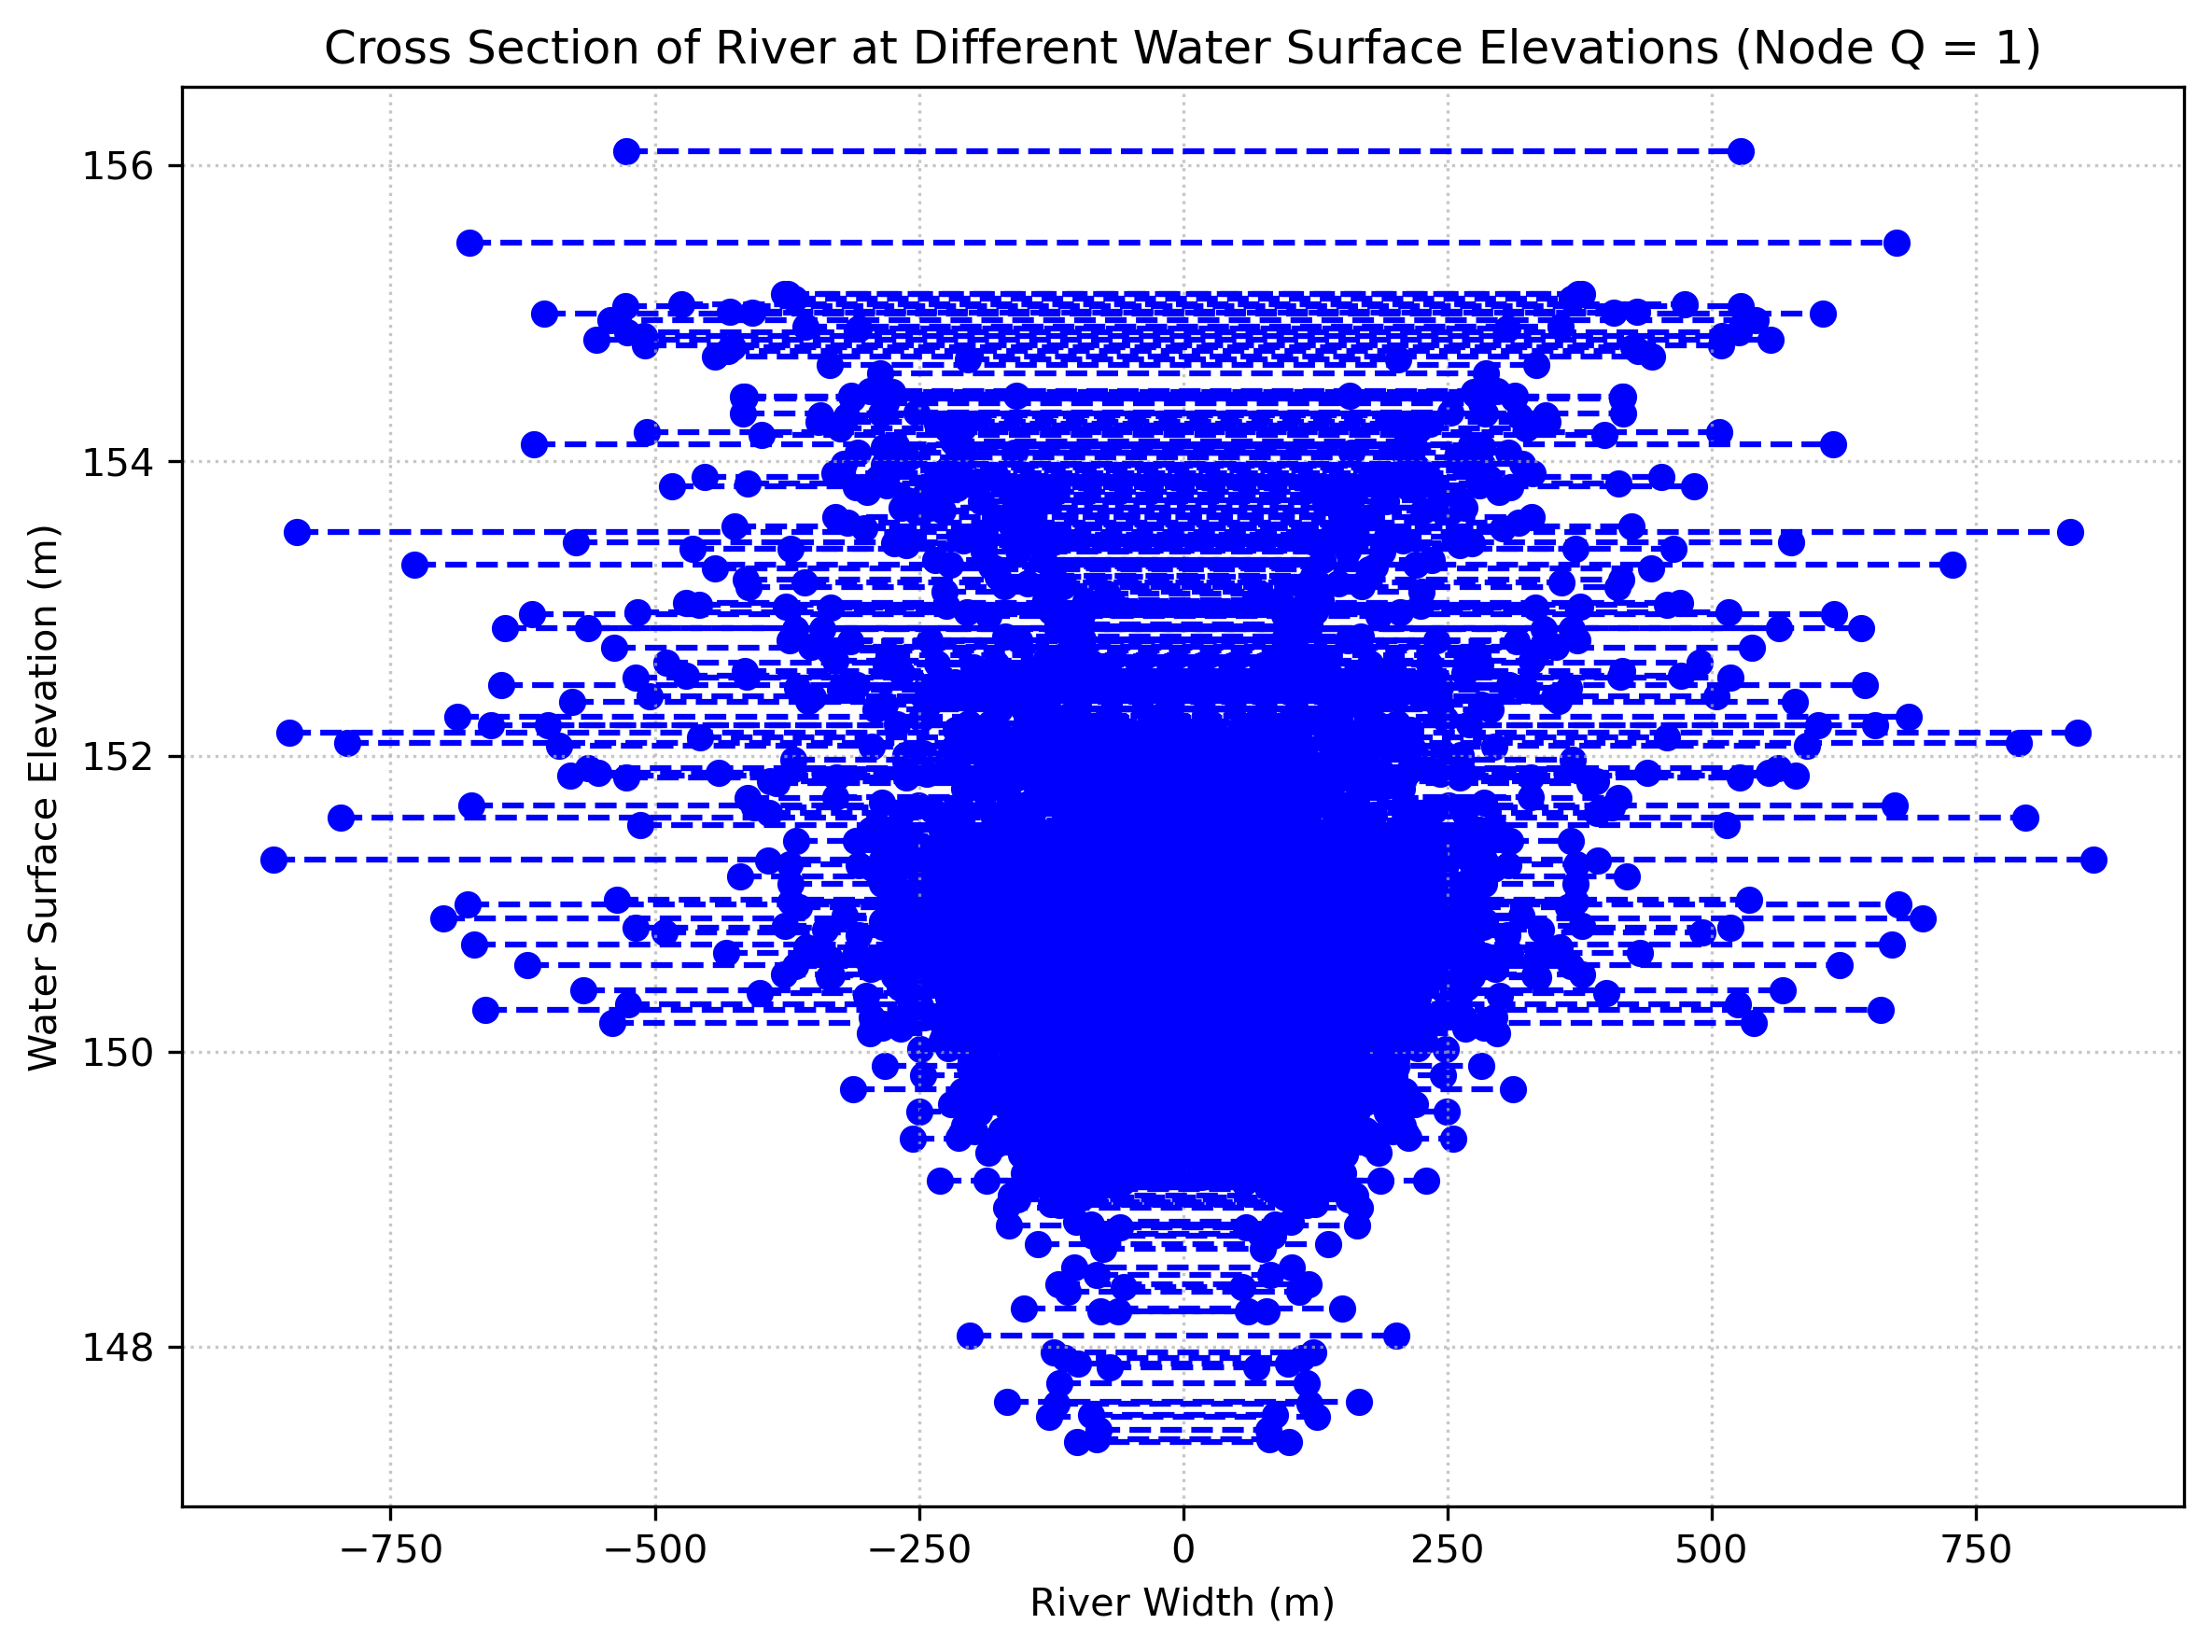

In [11]:
# Filter rows with proper datetime format for node_q=1
valid_data = df[(df['node_q'] == 1) & (df['time_str'].notnull())]

# Plot the cross-section for node_q=1 with valid datetime
plt.figure(figsize=(8, 6), dpi=300)  # Set high resolution with dpi=300

for _, row in valid_data.iterrows():
    width_half = row["width"] / 2
    wse = row["wse"]

    plt.scatter([-width_half, width_half], [wse, wse], color="blue")
    plt.plot([-width_half, width_half], [wse, wse], linestyle="dashed", color="blue")

plt.xlabel("River Width (m)")
plt.ylabel("Water Surface Elevation (m)")
plt.title("Cross Section of River at Different Water Surface Elevations (Node Q = 1)")
plt.grid(True, linestyle=":", alpha=0.7)
plt.tight_layout()  # Adjust layout
plt.savefig('figures_env_inf/cross_section_node_q1.png', dpi=300)  # Save with high resolution
plt.show()

In [12]:
# Import required module
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient and p-value using data from the main dataframe
corr_coef, p_value = pearsonr(df['wse'], df['width'])

print("Pearson correlation coefficient:", corr_coef)
print("P-value:", p_value)

# Test if the correlation is statistically significant (alpha = 0.05)
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

Pearson correlation coefficient: 0.5333226280620935
P-value: 3.694342120395707e-259
The correlation is statistically significant.


In [13]:
# Import required module
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient and p-value using data from the main dataframe
corr_coef, p_value = pearsonr(cleaned_data['wse'], cleaned_data['width'])

print("Pearson correlation coefficient:", corr_coef)
print("P-value:", p_value)

# Test if the correlation is statistically significant (alpha = 0.05)
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

Pearson correlation coefficient: 0.9176541317116569
P-value: 8.190144185815286e-08
The correlation is statistically significant.
